In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
import itertools as it

from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd

class data_object(object):
    def __init__(self, name):
        self.name = name

In [2]:
plt.style.use('seaborn-poster')

In [ ]:
with open('random_states_2.pickle','rb') as f:
    random_states = pickle.load(f)
random_states = {i:random_states[i] for i in random_states}

# First, let's take a look at solution statistics

In [3]:
total_runs = []
finished_initialization = []
finished_DDF_product = []
finished_revenue = []
finished_DDF_reflux = []
finished_profit_3 = []
finished_profit_3_1 = []
finished_profit_3_2 = []

with open('./log/master/master_log.txt','r') as f:
    for key, group in it.groupby(f,lambda line: line.startswith('------------')):
        if not key:
            run_data = list(group)

            # get run number
            start = 'Preset_Case_'
            end = '_'
            s = run_data[2]
            run_case = int(s[s.find(start)+len(start):s.rfind(end)])
            total_runs.append(run_case)
            
            # get status
            if 'Success: > Initialization\n' in run_data:
                finished_initialization.append(True)
            else:
                finished_initialization.append(False)
                
            if 'Success: > Added DDF formulation - Product\n' in run_data:
                finished_DDF_product.append(True)
            else:
                finished_DDF_product.append(False)
                
            if 'Success: > One-step Optimization - Revenue\n' in run_data:
                finished_revenue.append(True)
            else:
                finished_revenue.append(False)
                
            if 'Success: > Added DDF formulation - Reflux\n' in run_data:
                finished_DDF_reflux.append(True)
            else:
                finished_DDF_reflux.append(False)
                
            if 'Success: > One-step Optimization - Profit 3\n' in run_data:
                finished_profit_3.append(True)
            else:
                finished_profit_3.append(False)
            
            if 'Success: > One-step Optimization - Profit 3-1\n' in run_data:
                finished_profit_3_1.append(True)
            else:
                finished_profit_3_1.append(False)
                
            if 'Success: > One-step Optimization - Profit 3-2\n' in run_data:
                finished_profit_3_2.append(True)
            else:
                finished_profit_3_2.append(False)
                
finished_initialization = np.array(finished_initialization)
finished_DDF_product = np.array(finished_DDF_product)
finished_revenue = np.array(finished_revenue)
finished_DDF_reflux = np.array(finished_DDF_reflux)
finished_profit_3 = np.array(finished_profit_3)
finished_profit_3_1 = np.array(finished_profit_3_1)
finished_profit_3_2 = np.array(finished_profit_3_2)

# finished_optimization_any = np.any([finished_revenue,finished_profit_3,finished_profit_3_1],axis=0)
# finished_optimization_all = np.all([finished_revenue,finished_profit_3,finished_profit_3_1],axis=0)

In [4]:
initialization_failure_case = [total_runs[j_] for j_, j in enumerate(finished_initialization) if not j]
DDF_product_failure_case = [total_runs[j_] for j_, j in enumerate(finished_DDF_product) if not j]
revenue_failure_case = [total_runs[j_] for j_, j in enumerate(finished_revenue) if not j]
DDF_reflux_failure_case = [total_runs[j_] for j_, j in enumerate(finished_DDF_reflux) if not j]
profit_3_failure_case = [total_runs[j_] for j_, j in enumerate(finished_profit_3) if not j]
profit_3_1_failure_case = [total_runs[j_] for j_, j in enumerate(finished_profit_3_1) if not j]
profit_3_2_failure_case = [total_runs[j_] for j_, j in enumerate(finished_profit_3_2) if not j]

In [ ]:
reactive_stages = random_states[1].temperature_flag.keys()

In [ ]:
def divide_data(x):
    x = np.array(x)
    return x, x[finished_initialization], x[finished_optimization_any]

## Total number of attempts

In [5]:
len(total_runs)

995

## Successfully initialized

In [6]:
sum(finished_initialization), sum(finished_initialization) / len(total_runs)

(899, 0.9035175879396985)

## Successfully adopted product DDF formulation

In [7]:
sum(finished_DDF_product), sum(finished_DDF_product) / sum(finished_initialization)

(880, 0.978865406006674)

## Successfully reached revenue optimum solution

In [8]:
sum(finished_revenue), sum(finished_revenue) / sum(finished_DDF_product)

(564, 0.6409090909090909)

## Successfully adopted reflux DDF formulation

In [9]:
sum(finished_DDF_reflux), sum(finished_DDF_reflux) / sum(finished_revenue)

(564, 1.0)

## Successfully reached profit optimum solution

In [10]:
sum(finished_profit_3), sum(finished_profit_3) / sum(finished_DDF_reflux)

(562, 0.9964539007092199)

### Increasing tray cost weight

In [11]:
sum(finished_profit_3_1), sum(finished_profit_3_1) / sum(finished_DDF_reflux)

(550, 0.975177304964539)

### Increasing feed cost weight

In [12]:
sum(finished_profit_3_2), sum(finished_profit_3_2) / sum(finished_DDF_reflux)

(552, 0.9787234042553191)

# Different starting points doesn't seem to drastically affect success rate

In [ ]:
reflux_ratio_all = np.array([random_states[i].rr_ratio for i in random_states if i in total_runs])
intermediate_location_all = np.array([sorted(random_states[i].side_draw_flag.keys())[0] for i in random_states if i in total_runs])
intermediate_draw_all = np.array([list(random_states[i].side_draw_flag.values())[0] for i in random_states if i in total_runs])
gasoline_location_all = np.array([sorted(random_states[i].side_draw_flag.keys())[1] for i in random_states if i in total_runs])
gasoline_draw_all = np.array([list(random_states[i].side_draw_flag.values())[1] for i in random_states if i in total_runs])
diesel_location_all = np.array([sorted(random_states[i].side_draw_flag.keys())[2] for i in random_states if i in total_runs])
diesel_draw_all = np.array([list(random_states[i].side_draw_flag.values())[2] for i in random_states if i in total_runs])

fig, axs = plt.subplots(7,1,figsize=(16,14))

tmp_dic = {0:(reflux_ratio_all,'Reflux',(0.05,0.15),10),
          1:(intermediate_location_all,'Heavy naphtha Tray',(2,4),3),
          2:(intermediate_draw_all,'Heavy naphtha Draw',(0.01,0.04),10),
          3:(gasoline_location_all,'Gasoline Tray',(5,9),5),
          4:(gasoline_draw_all,'Gasoline Draw',(0.05,0.35),10),
          5:(diesel_location_all,'Diesel Tray',(11,18),8),
          6:(diesel_draw_all,'Diesel Draw',(0.15,0.55),10)}

for j in range(7):
    y, bins, patches = axs[j].hist((divide_data(tmp_dic[j][0])),bins=tmp_dic[j][3],histtype='bar',range=tmp_dic[j][2],alpha=0.7)
    ymax = max(y[0])
    axs[j].set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    ax_ = plt.twinx(axs[j])
    ax_.plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    ax_.plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    ax_.set_ylim(0,1.2)

    # ax.grid()
    axs[j].set_title(tmp_dic[j][1])

fig.legend(['Set-Point','Initialization','Optimized'])
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
temperature_all = {j:np.array([random_states[i].temperature_flag[j] for i in random_states if i in total_runs])\
                   for j in reactive_stages}

fig, axs = plt.subplots(len(reactive_stages),2,figsize=(16,14))

for j_, j in enumerate(reactive_stages):
    y, bins, patches = axs[j_][0].hist(divide_data(temperature_all[j]),bins=10,histtype='bar',range=(220,280),alpha=0.7)
    ymax = max(y[0])
    # ax.set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    axs[j_][1].plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].set_ylim(0,1.2)
    axs[j_][1].set_xlim(220,280)

axs[0][0].set_title('Temperature')
axs[0][0].legend(['Set-Point','Initialization','Optimization'])

plt.tight_layout()
plt.show()
plt.close()

# Strong 1-sided start seems to increase success rate

In [ ]:
catalyst_all = {j:np.array([random_states[i].catalyst_flag[j] for i in random_states if i in total_runs])\
                   for j in reactive_stages}

fig, axs = plt.subplots(len(reactive_stages),2,figsize=(16,14))

for j_, j in enumerate(reactive_stages):
    y, bins, patches = axs[j_][0].hist(divide_data(catalyst_all[j]),bins=10,histtype='bar',range=(0,7000),alpha=0.7)
    ymax = max(y[0])
    # ax.set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    axs[j_][1].plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].set_ylim(0,1.2)
    axs[j_][1].set_xlim(0,7000)

axs[0][0].set_title('catalyst')
axs[0][0].legend(['Set-Point','Initialization','Optimization'])

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
feed_all = {j:np.array([random_states[i].feed_flag[j] for i in random_states if i in total_runs])\
                   for j in reactive_stages}

fig, axs = plt.subplots(len(reactive_stages),2,figsize=(16,14))

for j_, j in enumerate(reactive_stages):
    y, bins, patches = axs[j_][0].hist(divide_data(feed_all[j]),bins=10,histtype='bar',range=(0,3),alpha=0.7)
    ymax = max(y[0])
    # ax.set_ylim(bottom=0,top=2*ymax)

    bincenters = 0.5*(bins[1:]+bins[:-1])
    ratio_init = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[1],y[0])]
    ratio_opt = [float('nan') if j==0 or i==0 else i/j for i,j in zip(y[2],y[1])]

    axs[j_][1].plot(bincenters,ratio_init,'C1:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].plot(bincenters,ratio_opt,'C2:o',markeredgecolor='w',markersize=12,markeredgewidth = 1)
    axs[j_][1].set_ylim(0,1.2)
    axs[j_][1].set_xlim(0,3)

axs[0][0].set_title('feed')
axs[0][0].legend(['Set-Point','Initialization','Optimization'])

plt.tight_layout()
plt.show()
plt.close()

# Reduce dimension for visulization using PCA, uniform distribution, expect to yield little capture

In [ ]:
x_data = np.stack((
    reflux_ratio_all,
    intermediate_location_all,
    intermediate_draw_all,
    gasoline_location_all,
    gasoline_draw_all,
    diesel_location_all,
    diesel_draw_all,
    *[temperature_all[j] for j in temperature_all],
    *[catalyst_all[j] for j in temperature_all],
    *[feed_all[j] for j in temperature_all]
),axis=1)

## 46 features

In [ ]:
x_data.shape

In [ ]:
center_scaled = StandardScaler().fit_transform(x_data)
pca = PCA(n_components=10)
scores = pca.fit_transform(center_scaled)

### Eigenvalues

In [ ]:
pca.explained_variance_

### Captured Covariance

In [ ]:
pca.explained_variance_ratio_

### Loadings - PC1 - Mostly independent, except temperature, which have same signs, meaning one temperature increases, the other ones increases, this response is modelled by sorting temperature from low to high

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))
x_loc = np.arange(1,len(pca.components_[0])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs.bar(x_loc[grouping[key]],pca.components_[0][grouping[key]])
axs.set_xticks([1,4.5,14,27,40])
axs.set_xticklabels(list(grouping.keys()))

axs.set_xlabel('Variable')
axs.set_ylabel('Loading')
plt.show()
plt.close()

### Scores - Success rate is not biased towards certain combination, uniform distributed set of initialized solutions for optimization multi-start

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Random Start', 'Initialization Complete', 'Optimized Any', 'Optimized All']
colors = ['C1', 'C2', 'C3','C4']
masks = {'Random Start':True,\
         'Initialization Complete':finished_initialization,\
         'Optimized Any':finished_optimization_any,\
         'Optimized All':finished_optimization_all}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,0][mask],scores[:,1][mask],color=color,label=target)

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

# Second, let's take a look at cause of failure and performance

In [ ]:
# initialization_failure_case
# DDF_product_failure_case
# revenue_failure_case
# DDF_reflux_failure_case
# profit_3_failure_case
# profit_3_1_failure_case
# profit_3_1_failure_case

In [13]:
failure_cause_list = []

for j in DDF_product_failure_case:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()
        for line in reversed(log_content):
            if line.startswith('>') or 'Working on' in line:
                break_cause = line.replace('> ','')
                failure_cause_list.append(break_cause)
                break

# print(len(failure_cause_list))

### Combine failure causes

In [14]:
failure_short = []
for line in failure_cause_list:
    
    if 'temperature' in line:
        start = 'Working on adjusting '
        end = 'temperature'
        failure_short.append(line[line.find(start) + len(start) : line.rfind(end)] + 'Temp')
    
    elif 'changing Q' in line:
        start = 'Working on '
        end = ','
        failure_short.append(line[line.find(start) + len(start) : line.rfind(end)] + ' duty')
    
    elif 'catalyst and feed' in line:
        start = 'alpha = '
        end = ':'
        failure_short.append('alpha: ' + line[line.find(start) + len(start) : line.rfind(end)] + ' feed/catalyst')
    
    elif 'Reflux' in line:
        start = 'PR ratio = '
        end = '\n'
        failure_short.append('PR-ratio: '+ line[line.find(start) + len(start) : line.rfind(end)] + ' reflux')
    
    elif 'Connect' in line:
        failure_short.append('stages 20 connect')
        
    elif 'DDF' in line:
        failure_short.append('add 3 DDF')
    
    else:
        failure_short.append(line.replace('\n',''))

In [15]:
failure_counts = Counter(failure_short)
failure_counts = sorted(dict(failure_counts).items(),key=lambda x: (x[0].split(' ')[-1],float(x[0].split(' ')[1])),reverse=False)
       
failure_dic = {}
for key, group in it.groupby(failure_counts,lambda pair: pair[0].split()[-1]):
    failure_dic[key] = list(group)

In [ ]:
# failure_counts

In [16]:
failure_dic

{'DDF': [('add 3 DDF', 19)],
 'Temp': [('stage 9 Temp', 1),
  ('stage 11 Temp', 1),
  ('stage 14 Temp', 1),
  ('stage 15 Temp', 1),
  ('stage 17 Temp', 1),
  ('stage 18 Temp', 1),
  ('stage 20 Temp', 1)],
 'connect': [('stages 20 connect', 1)],
 'duty': [('stage 1 duty', 5),
  ('stage 2 duty', 3),
  ('stage 4 duty', 10),
  ('stage 5 duty', 5),
  ('stage 6 duty', 2),
  ('stage 7 duty', 7)],
 'feed/catalyst': [('alpha: 0.64 feed/catalyst', 1),
  ('alpha: 0.76 feed/catalyst', 2),
  ('alpha: 0.84 feed/catalyst', 7),
  ('alpha: 0.88 feed/catalyst', 4),
  ('alpha: 0.92 feed/catalyst', 13),
  ('alpha: 0.96 feed/catalyst', 14),
  ('alpha: 1.00 feed/catalyst', 14)],
 'reflux': [('PR-ratio: 0.14 reflux', 1)]}

In [17]:
sum(i[1] for i in failure_counts)

115

## Initialization failures seem to happen near the bottom stage, largely independent of design specifications, definitely could be further improved

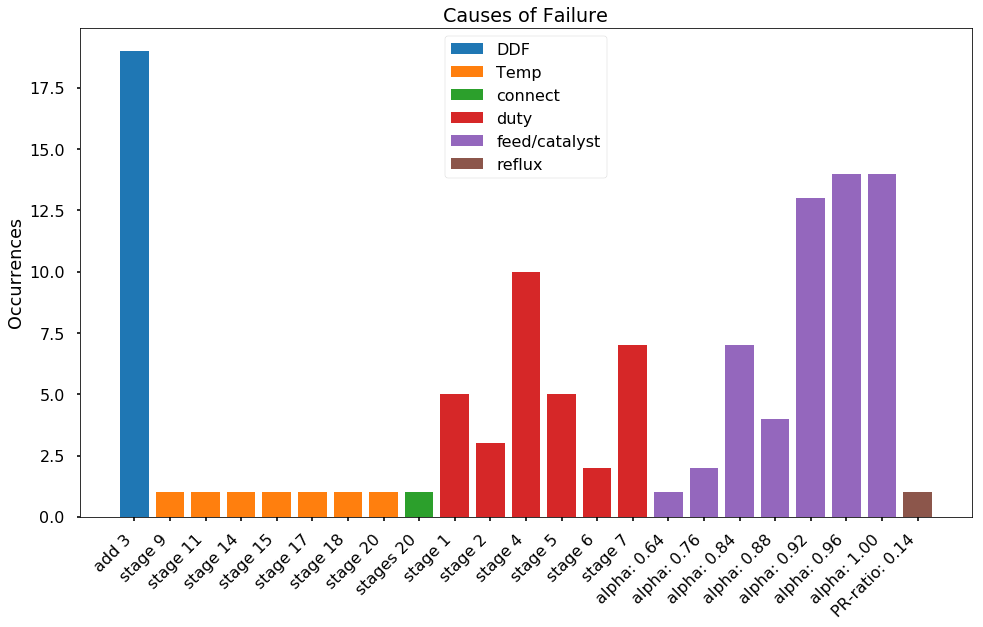

In [18]:
fig, axs = plt.subplots(figsize=(16,9))
loc = 0
names = []
for key in failure_dic.keys():
    frequencies = [j for i,j in failure_dic[key]]
    names += [i[:i.rfind(' ')] for i,j in failure_dic[key]]

    x_coordinates = np.arange(loc,len(failure_dic[key])+loc)
    axs.bar(x_coordinates, frequencies, align='center',label = key)
    loc += len(failure_dic[key])

axs.set_xticks(np.arange(loc))
axs.set_xticklabels(names,rotation=45,ha='right')

axs.set_ylabel('Occurrences')
axs.legend()
axs.set_title('Causes of Failure')
plt.show()

## Optimization Failure

In [19]:
revenue_fail_list = []
profit_3_fail_list = []
profit_3_1_fail_list = []
profit_3_2_fail_list = []

for j in [j for j in revenue_failure_case if j not in DDF_product_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    revenue_fail_list.append('Restoration Failed')
                else:
                    revenue_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break


for j in [j for j in profit_3_failure_case if j not in DDF_reflux_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    profit_3_fail_list.append('Restoration Failed')
                else:
                    profit_3_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break

        
for j in [j for j in profit_3_1_failure_case if j not in DDF_reflux_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    profit_3_1_fail_list.append('Restoration Failed')
                else:
                    profit_3_1_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break


for j in [j for j in profit_3_2_failure_case if j not in DDF_reflux_failure_case]:
    file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
    with open('./log/text/'+file_name) as f:
        log_content = f.readlines()

        for line in reversed(log_content):
            if line.startswith('EXIT:'):
                if 'Optimal Solution Found' in line:
                    profit_3_2_fail_list.append('Restoration Failed')
                else:
                    profit_3_2_fail_list.append(line.replace('EXIT: ','').replace('\n',''))
                break

In [20]:
Counter(revenue_fail_list), Counter(profit_3_fail_list), Counter(profit_3_1_fail_list), Counter(profit_3_2_fail_list) 

(Counter({'Maximum Number of Iterations Exceeded.': 304,
          'Restoration Failed': 11,
          'Converged to a point of local infeasibility. Problem may be infeasible.': 1}),
 Counter({'Restoration Failed': 2}),
 Counter({'Restoration Failed': 14}),
 Counter({'Restoration Failed': 1,
          'Maximum Number of Iterations Exceeded.': 11}))

# Lastly, optimization results

In [21]:
revenue_obj_list = []
revenue_case_list = []
revenue_opt_results = []
revenue_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_revenue[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Revenue' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '\n'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    revenue_obj_list.append(float(string))
                    revenue_case_list.append(case)
                    break
#             revenue_opt_results.append(log_content[-j-30:-j-29]+log_content[-j-20:-j-7]+log_content[-j-1:-j+1])
#             revenue_opt_origin_results.append(log_content[-j-80:-j-79]+log_content[-j-70:-j-57]+log_content[-j-51:-j-49])
            
# revenue_opt_results = [[data.split() for data in case] for case in revenue_opt_results]
# revenue_opt_origin_results = [[data.split() for data in case] for case in revenue_opt_origin_results]

In [22]:
profit_3_obj_list = []
profit_3_case_list = []
profit_3_opt_results = []
profit_3_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_profit_3[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Profit 3' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '\n'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    profit_3_obj_list.append(float(string))
                    profit_3_case_list.append(case)
                    break
#             profit_3_opt_results.append(log_content[-j-30:-j-29]+log_content[-j-20:-j-7]+log_content[-j-1:-j+1])
#             profit_3_opt_origin_results.append(log_content[-j-80:-j-79]+log_content[-j-70:-j-57]+log_content[-j-51:-j-49])
            
# profit_3_opt_results = [[data.split() for data in case] for case in profit_3_opt_results]
# profit_3_opt_origin_results = [[data.split() for data in case] for case in profit_3_opt_origin_results]

In [23]:
profit_3_1_obj_list = []
profit_3_1_case_list = []
profit_3_1_opt_results = []
profit_3_1_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_profit_3_1[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Profit 3-1' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '\n'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    profit_3_1_obj_list.append(float(string))
                    profit_3_1_case_list.append(case)
                    break
#             profit_3_1_opt_results.append(log_content[-j-30:-j-29]+log_content[-j-20:-j-7]+log_content[-j-1:-j+1])
#             profit_3_1_opt_origin_results.append(log_content[-j-80:-j-79]+log_content[-j-70:-j-57]+log_content[-j-51:-j-49])
            
# profit_3_1_opt_results = [[data.split() for data in case] for case in profit_3_1_opt_results]
# profit_3_1_opt_origin_results = [[data.split() for data in case] for case in profit_3_1_opt_origin_results]

In [24]:
profit_3_2_obj_list = []
profit_3_2_case_list = []
profit_3_2_opt_results = []
profit_3_2_opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_profit_3_2[j_]:
        file_name = 'mul_onestep_Preset_Case_{}_pf.dat'.format(j)
        case = j
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Profit 3-2' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('obj'):
                    start = 'obj '
                    end = '\n'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    profit_3_2_obj_list.append(float(string))
                    profit_3_2_case_list.append(case)
                    break
#             profit_3_2_opt_results.append(log_content[-j-30:-j-29]+log_content[-j-20:-j-7]+log_content[-j-1:-j+1])
#             profit_3_2_opt_origin_results.append(log_content[-j-80:-j-79]+log_content[-j-70:-j-57]+log_content[-j-51:-j-49])
            
# profit_3_2_opt_results = [[data.split() for data in case] for case in profit_3_2_opt_results]
# profit_3_2_opt_origin_results = [[data.split() for data in case] for case in profit_3_2_opt_origin_results]

In [25]:
revenue_case_list[np.argmax(revenue_obj_list)], max(revenue_obj_list)

(63, 22.327634492598126)

In [26]:
profit_3_case_list[np.argmax(profit_3_obj_list)], max(profit_3_obj_list)

(317, 2.1552582649614807)

In [27]:
profit_3_1_case_list[np.argmax(profit_3_1_obj_list)], max(profit_3_1_obj_list)

(447, 2.901206608896368)

In [28]:
profit_3_2_case_list[np.argmax(profit_3_2_obj_list)], max(profit_3_2_obj_list)

(414, 6.294277545925963)

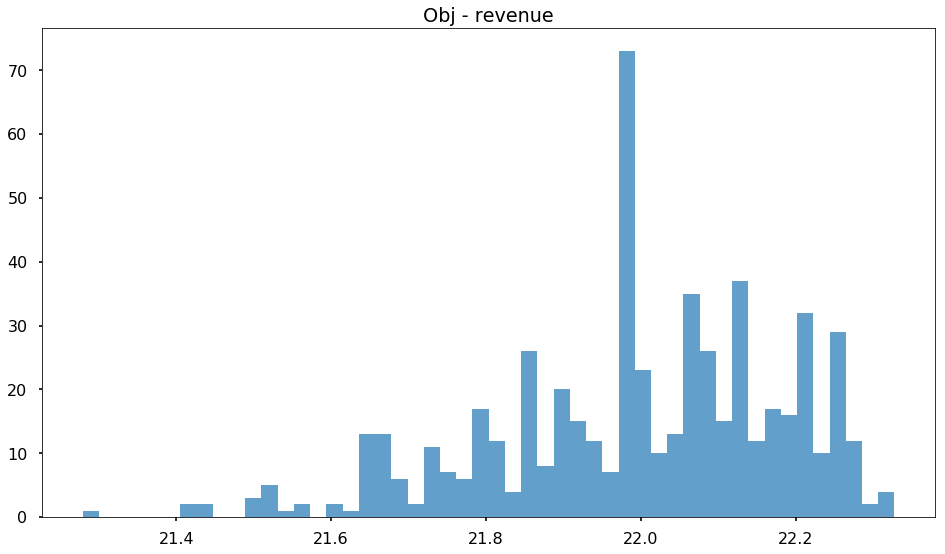

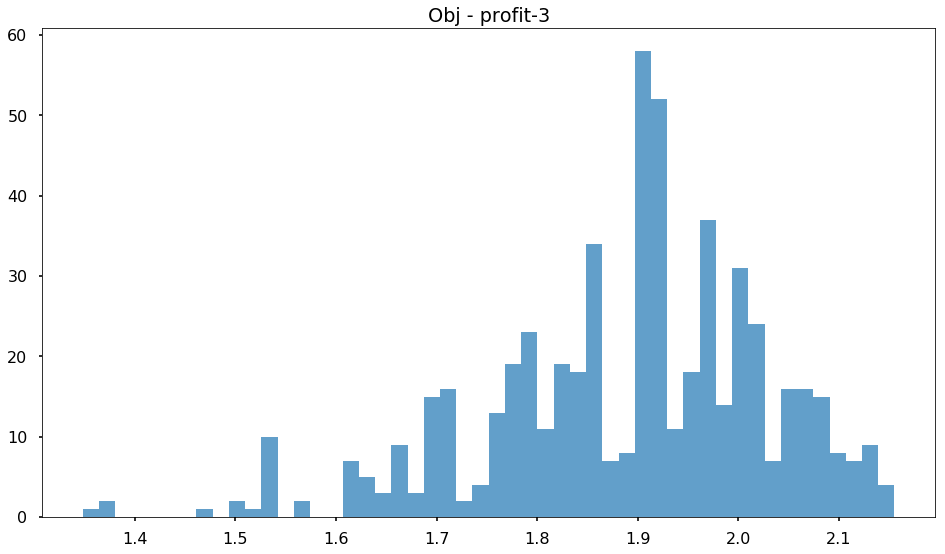

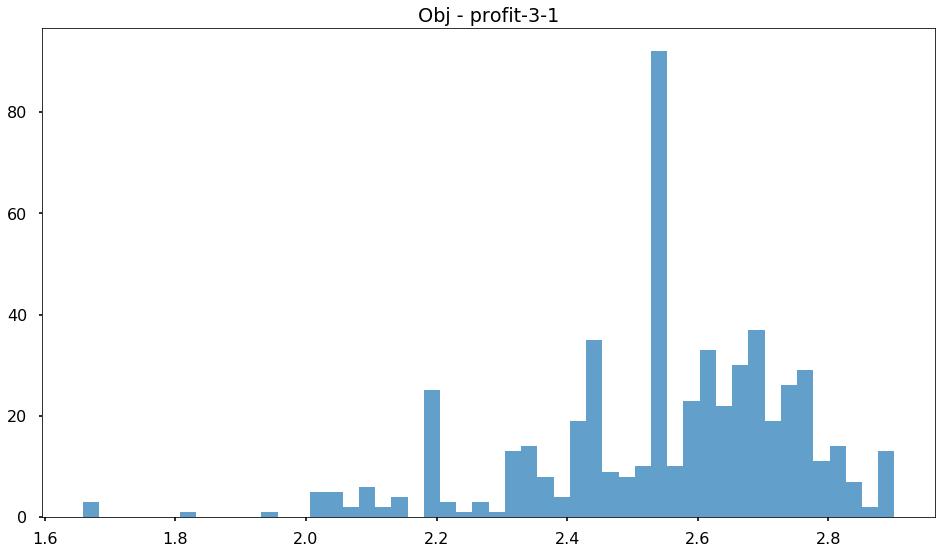

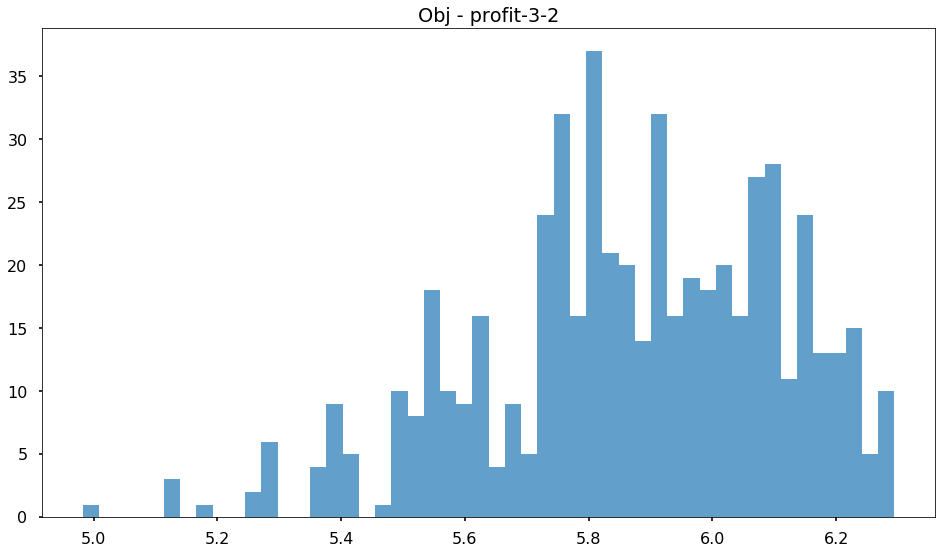

In [29]:
fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(revenue_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - revenue')

fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(profit_3_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - profit-3')

fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(profit_3_1_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - profit-3-1')

fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(profit_3_2_obj_list,bins=50,histtype='bar',alpha=0.7)
axs.set_title('Obj - profit-3-2')

plt.show()

### Remove duplicates and sort

In [ ]:
opt_results_matrix = np.stack((
    [float(case[0][4])/float(case[0][5]) for case in opt_results],
    [float(case[-3][-1]) for case in opt_results],
    [float(case[-3][6]) for case in opt_results],
    [float(case[-2][-1]) for case in opt_results],
    [float(case[-2][6]) for case in opt_results],
    [float(case[-1][-1]) for case in opt_results],
    [float(case[-1][6]) for case in opt_results],
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in opt_results]).T,
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in opt_results]).T,
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in opt_results]).T
),axis=1)

In [ ]:
opt_origin_matrix = np.stack((
    [float(case[0][4])/float(case[0][5]) for case in opt_origin_results],
    [float(case[-3][-1]) for case in opt_origin_results],
    [float(case[-3][6]) for case in opt_origin_results],
    [float(case[-2][-1]) for case in opt_origin_results],
    [float(case[-2][6]) for case in opt_origin_results],
    [float(case[-1][-1]) for case in opt_origin_results],
    [float(case[-1][6]) for case in opt_origin_results],
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in opt_origin_results]).T,
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in opt_origin_results]).T,
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in opt_origin_results]).T
),axis=1)

In [ ]:
opt_results_unique_unsorted, unique_index, unique_counts = np.unique(opt_results_matrix,axis=0,return_index=True,return_counts=True)

In [ ]:
unique_global_index = [np.array(total_runs)[finished_gasoline][j] for j in unique_index]
opt_results_unique = np.array(sorted(opt_results_unique_unsorted,key=lambda x: x[4]))

In [ ]:
pd.options.display.precision = 4
pd.DataFrame(sorted([i for i in zip(opt_results_unique_unsorted[:,4],unique_counts,unique_global_index)],\
                    key=lambda x: x[0]),columns=['Objective Value','Occurances','Example Index'])

### Raw Data

In [ ]:
pd.options.display.expand_frame_repr = False
pd.options.display.max_colwidth = 80000
pd.options.display.max_columns = None
pd.options.display.max_rows = 80000

In [ ]:
pd.options.display.precision = 0
pd.DataFrame(opt_results_unique[:,7:20].T,index=['Tem{}'.format(j) for j in range(8,21)])

In [ ]:
pd.options.display.precision = 0
pd.DataFrame(opt_results_unique[:,20:33].T,index=['Catalyst {}'.format(j) for j in range(8,21)])

In [ ]:
pd.options.display.precision = 2
pd.DataFrame(opt_results_unique[:,33:].T,index=['Feed {}'.format(j) for j in range(8,21)]).round(2)

# Analysis

In [ ]:
center_scaled = StandardScaler().fit_transform(opt_results_unique)
pca = PCA(n_components=10)
scores = pca.fit_transform(center_scaled)

### Eigenvalues

In [ ]:
pca.explained_variance_

### Captured Covariance

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_[:5])

### A strong corrolation between PC1 and optimized objective value

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(16,9))

'''
Scores
'''
x_loc = np.arange(1,len(scores[:,0])+1)
axs[0].bar(x_loc,scores[:,0],color = 'C1')

axs_ = axs[0].twinx()
axs_.plot(x_loc,opt_results_unique[:,4],'C2:o',markeredgecolor='w',markeredgewidth = 1,markersize=12)

# axs[1].legend()
axs[0].set_xlabel('Local Minimums')
axs[0].set_ylabel('Score - PC1')
axs_.set_ylabel('Gasoline Production')

'''
Loading
'''
x_loc = np.arange(1,len(pca.components_[0])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs[1].bar(x_loc[grouping[key]],pca.components_[0][grouping[key]])
axs[1].set_xticks([1,4.5,14,27,40])
axs[1].set_xticklabels(list(grouping.keys()))

axs[1].set_ylabel('Loading - PC1')

plt.tight_layout()
plt.show()
plt.close()

### Predictions using pre-optimization data

In [ ]:
opt_origin_scaled = StandardScaler().fit_transform(opt_origin_matrix)

In [ ]:
predicted_scores = pca.transform(opt_origin_scaled)

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
masks = {'Bad':[[0,0.132],slice(0,10),80],\
         'Middle':[[0.1341,0.1395],slice(10,20),10],\
         'Good':[[0.1396,0.1408],slice(20,60),10],\
         'Super':[[0.1409,0.15],slice(60,87),80]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,0][mask[1]],scores[:,1][mask[1]],color=color,label=target)
    tmp = [j for j,run in enumerate(opt_results_matrix) if run[4] >= mask[0][0] and run[4] <= mask[0][1]]

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

### Separating between "Middle" and "Good" will involve 3rd and 4th component

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Middle','Good']
colors = ['C2','C3']
masks = {'Middle':[[0.1341,0.1395],slice(20,60),20],\
         'Good':[[0.1396,0.1408],slice(60,87),20]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,2][mask[1]],scores[:,3][mask[1]],color=color,label=target)
    tmp = [j for j,run in enumerate(opt_results_matrix) if run[4] >= mask[0][0] and run[4] <= mask[0][1]]

axs.legend()
axs.set_xlabel('Principal Component 3')
axs.set_ylabel('Principal Component 4')

plt.show()
plt.close()

---

# Lastly, optimization results, Diesel

In [ ]:
obj_list = []
opt_results = []
opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_diesel[j_]:
        file_name = 'mul_onestep_Preset_Case:_{}_NCP.dat'.format(j)
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            counter = 0
            
            for j, line in enumerate(reversed(log_content)):
                # get the right position, i know it is bad coding, but dont want make too much changes to the old code
                if '> One-step Optimization - Diesel' in line:
                    starter_position = j - 50            
            
            
            for j, line in enumerate(reversed(log_content)):

                if j <= starter_position:
                    continue
                
                if line.startswith('diesel'):
                    start = 'Wet flow  :'
                    end = 'Dry flow'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    obj_list.append(float(string))
                    j += 1
                    break
            opt_results.append(log_content[-j-30:-j-29]+log_content[-j-20:-j-7]+log_content[-j-1:-j+1])
            opt_origin_results.append(log_content[-j-80:-j-79]+log_content[-j-70:-j-57]+log_content[-j-51:-j-49])
            
opt_results = [[data.split() for data in case] for case in opt_results]
opt_origin_results = [[data.split() for data in case] for case in opt_origin_results]

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(obj_list,bins=50,histtype='bar',alpha=0.7)

axs.set_title('Obj - diesel')
plt.show()

### Remove duplicates and sort

In [ ]:
opt_results_matrix = np.stack((
    [float(case[0][4])/float(case[0][5]) for case in opt_results],
    [float(case[-3][-1]) for case in opt_results],
    [float(case[-3][6]) for case in opt_results],
    [float(case[-2][-1]) for case in opt_results],
    [float(case[-2][6]) for case in opt_results],
    [float(case[-1][-1]) for case in opt_results],
    [float(case[-1][6]) for case in opt_results],
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in opt_results]).T,
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in opt_results]).T,
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in opt_results]).T
),axis=1)

In [ ]:
opt_results_unique_unsorted, unique_index, unique_counts = np.unique(opt_results_matrix,axis=0,return_index=True,return_counts=True)

In [ ]:
unique_global_index = [np.array(total_runs)[finished_gasoline][j] for j in unique_index]
opt_results_unique = np.array(sorted(opt_results_unique_unsorted,key=lambda x: x[4]))

In [ ]:
pd.options.display.precision = 4
pd.DataFrame(sorted([i for i in zip(opt_results_unique_unsorted[:,4],unique_counts,unique_global_index)],\
                    key=lambda x: x[0]),columns=['Objective Value','Occurances','Example Index'])

### Raw Data

In [ ]:
pd.options.display.expand_frame_repr = False
pd.options.display.max_colwidth = 80000
pd.options.display.max_columns = None
pd.options.display.max_rows = 80000

In [ ]:
pd.options.display.precision = 0
pd.DataFrame(opt_results_unique[:,7:20].T,index=['Tem{}'.format(j) for j in range(8,21)])

In [ ]:
pd.options.display.precision = 0
pd.DataFrame(opt_results_unique[:,20:33].T,index=['Catalyst {}'.format(j) for j in range(8,21)])

In [ ]:
pd.options.display.precision = 2
pd.DataFrame(opt_results_unique[:,33:].T,index=['Feed {}'.format(j) for j in range(8,21)]).round(2)

# Analysis

In [ ]:
center_scaled = StandardScaler().fit_transform(opt_results_unique)
pca = PCA(n_components=10)
scores = pca.fit_transform(center_scaled)

### Eigenvalues

In [ ]:
pca.explained_variance_

### Captured Covariance

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_[:5])

### A strong corrolation between PC1 and optimized objective value

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(16,9))

'''
Scores
'''
x_loc = np.arange(1,len(scores[:,0])+1)
axs[0].bar(x_loc,scores[:,0],color = 'C1')

axs_ = axs[0].twinx()
axs_.plot(x_loc,opt_results_unique[:,4],'C2:o',markeredgecolor='w',markeredgewidth = 1,markersize=12)

# axs[1].legend()
axs[0].set_xlabel('Local Minimums')
axs[0].set_ylabel('Score - PC1')
axs_.set_ylabel('Diesel Production')

'''
Loading
'''
x_loc = np.arange(1,len(pca.components_[0])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs[1].bar(x_loc[grouping[key]],pca.components_[0][grouping[key]])
axs[1].set_xticks([1,4.5,14,27,40])
axs[1].set_xticklabels(list(grouping.keys()))

axs[1].set_ylabel('Loading - PC1')

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
opt_origin_scaled = StandardScaler().fit_transform(opt_origin_matrix)

In [ ]:
predicted_scores = pca.transform(opt_origin_scaled)

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
masks = {'Bad':[[0,0.132],slice(0,50),80],\
         'Middle':[[0.1341,0.1395],slice(50,120),10],\
         'Good':[[0.1396,0.1408],slice(120,140),10],\
         'Super':[[0.1409,0.15],slice(140,155),80]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,0][mask[1]],scores[:,1][mask[1]],color=color,label=target)
    tmp = [j for j,run in enumerate(opt_results_matrix) if run[4] >= mask[0][0] and run[4] <= mask[0][1]]

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

---

# Lastly, optimization results, Combined

In [ ]:
obj_list = []
opt_results = []
opt_origin_results = []

for j_,j in enumerate(total_runs):
    if finished_combined[j_]:
        file_name = 'mul_onestep_Preset_Case:_{}_NCP.dat'.format(j)
        with open('./log/text/'+file_name) as f:
            log_content = f.readlines()
            counter = 0
            tmp_number = 0
            for j, line in enumerate(reversed(log_content)):
                
                if line.startswith('diesel'):
                    start = 'Wet flow  :'
                    end = 'Dry flow'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    tmp_number += float(string)               

                if line.startswith('gasoline'):
                    start = 'Wet flow  :'
                    end = 'Dry flow'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    tmp_number += float(string) 
                    
                if line.startswith('naphtha'):
                    start = 'Wet flow  :'
                    end = 'Dry flow'
                    string = line[line.find(start)+len(start):line.rfind(end)]
                    string = string.strip()
                    tmp_number += float(string) 
                    obj_list.append(tmp_number)
                    j -= 1
                    break
                    
            opt_results.append(log_content[-j-30:-j-29]+log_content[-j-20:-j-7]+log_content[-j-1:-j+1])
            opt_origin_results.append(log_content[-j-80:-j-79]+log_content[-j-70:-j-57]+log_content[-j-51:-j-49])
            
opt_results = [[data.split() for data in case] for case in opt_results]
opt_origin_results = [[data.split() for data in case] for case in opt_origin_results]

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))
y, bins, patches = axs.hist(obj_list,bins=50,histtype='bar',alpha=0.7)

axs.set_title('Obj - gasoline')
plt.show()

### Remove duplicates and sort

In [ ]:
opt_results_matrix = np.stack((
    [float(case[0][4])/float(case[0][5]) for case in opt_results],
    [float(case[-3][-1]) for case in opt_results],
    [float(case[-3][6]) for case in opt_results],
    [float(case[-2][-1]) for case in opt_results],
    [float(case[-2][6]) for case in opt_results],
    [float(case[-1][-1]) for case in opt_results],
    [float(case[-1][6]) for case in opt_results],
    *np.array([[float(obv[1]) for obv in case[1:14]] for case in opt_results]).T,
    *np.array([[float(obv[6]) for obv in case[1:14]] for case in opt_results]).T,
    *np.array([[float(obv[5]) for obv in case[1:14]] for case in opt_results]).T
),axis=1)

In [ ]:
opt_results_unique_unsorted, unique_index, unique_counts = np.unique(opt_results_matrix,axis=0,return_index=True,return_counts=True)

In [ ]:
unique_global_index = [np.array(total_runs)[finished_gasoline][j] for j in unique_index]
opt_results_unique = np.array(sorted(opt_results_unique_unsorted,key=lambda x: x[4]))

In [ ]:
pd.options.display.precision = 4
pd.DataFrame(sorted([i for i in zip(opt_results_unique_unsorted[:,4],unique_counts,unique_global_index)],\
                    key=lambda x: x[0]),columns=['Objective Value','Occurances','Example Index'])

### Raw Data

In [ ]:
pd.options.display.expand_frame_repr = False
pd.options.display.max_colwidth = 80000
pd.options.display.max_columns = None
pd.options.display.max_rows = 80000

In [ ]:
pd.options.display.precision = 0
pd.DataFrame(opt_results_unique[:,7:20].T,index=['Tem{}'.format(j) for j in range(8,21)])

In [ ]:
pd.options.display.precision = 0
pd.DataFrame(opt_results_unique[:,20:33].T,index=['Catalyst {}'.format(j) for j in range(8,21)])

In [ ]:
pd.options.display.precision = 2
pd.DataFrame(opt_results_unique[:,33:].T,index=['Feed {}'.format(j) for j in range(8,21)]).round(2)

# Analysis

In [ ]:
center_scaled = StandardScaler().fit_transform(opt_results_unique)
pca = PCA(n_components=10)
scores = pca.fit_transform(center_scaled)

### Eigenvalues

In [ ]:
pca.explained_variance_

### Captured Covariance

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_[:5])

### A strong corrolation between PC1 and optimized objective value

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(16,9))

'''
Scores
'''
x_loc = np.arange(1,len(scores[:,0])+1)
axs[0].bar(x_loc,scores[:,0],color = 'C1')

axs_ = axs[0].twinx()
axs_.plot(x_loc,opt_results_unique[:,4],'C2:o',markeredgecolor='w',markeredgewidth = 1,markersize=12)

# axs[1].legend()
axs[0].set_xlabel('Local Minimums')
axs[0].set_ylabel('Score - PC1')
axs_.set_ylabel('Gasoline Production')

'''
Loading
'''
x_loc = np.arange(1,len(pca.components_[0])+1)
grouping = {'Reflux':slice(0,1),'Product':slice(1,7),'Temperature':slice(7,20),\
            'Catalyst':slice(20,33),'Feed':slice(33,None)}

for key in grouping:
    axs[1].bar(x_loc[grouping[key]],pca.components_[0][grouping[key]])
axs[1].set_xticks([1,4.5,14,27,40])
axs[1].set_xticklabels(list(grouping.keys()))

axs[1].set_ylabel('Loading - PC1')

plt.tight_layout()
plt.show()
plt.close()

### Predictions using pre-optimization data

In [ ]:
opt_origin_scaled = StandardScaler().fit_transform(opt_origin_matrix)

In [ ]:
predicted_scores = pca.transform(opt_origin_scaled)

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Bad','Middle','Good','Super']
colors = ['C1', 'C2','C3','C4']
masks = {'Bad':[[0,0.132],slice(0,10),80],\
         'Middle':[[0.1341,0.1395],slice(10,20),10],\
         'Good':[[0.1396,0.1408],slice(20,60),10],\
         'Super':[[0.1409,0.15],slice(60,87),80]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,0][mask[1]],scores[:,1][mask[1]],color=color,label=target)
    tmp = [j for j,run in enumerate(opt_results_matrix) if run[4] >= mask[0][0] and run[4] <= mask[0][1]]

axs.legend()
axs.set_xlabel('Principal Component 1')
axs.set_ylabel('Principal Component 2')

plt.show()
plt.close()

### Separating between "Middle" and "Good" will involve 3rd and 4th component

In [ ]:
fig, axs = plt.subplots(figsize=(16,9))

targets = ['Middle','Good']
colors = ['C2','C3']
masks = {'Middle':[[0.1341,0.1395],slice(20,60),20],\
         'Good':[[0.1396,0.1408],slice(60,87),20]}

for target, color in zip(targets,colors):
    mask = masks[target]
    axs.scatter(scores[:,2][mask[1]],scores[:,3][mask[1]],color=color,label=target)
    tmp = [j for j,run in enumerate(opt_results_matrix) if run[4] >= mask[0][0] and run[4] <= mask[0][1]]

axs.legend()
axs.set_xlabel('Principal Component 3')
axs.set_ylabel('Principal Component 4')

plt.show()
plt.close()

---